In [25]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date


In [56]:
def plot_hist_with_cumprob(data, xlabel, bins=50):
    """
    Plots a histogram with a secondary y-axis for cumulative probability.

    Parameters:
    data (array-like): The data to be histogrammed.
    bins (int): The number of bins for the histogram.
    """
    fig, ax1 = plt.subplots()

    # Histogram on the primary y-axis
    n, bins, patches = ax1.hist(data, bins=bins, color='blue')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Frequency', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Secondary y-axis for the cumulative probability
    ax2 = ax1.twinx()

    # Calculate the cumulative probability
    cumulative = np.cumsum(n) / n.sum()
    ax2.plot(bins[:-1], cumulative, color='red')
    ax2.set_ylabel('Cumulative Probability', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Set the limits of the cumulative probability axis from 0 to 1
    ax2.set_ylim(0, 1)

    # Set the ticks for the cumulative probability
    ax2.set_yticks(np.arange(0, 1.1, 0.1))

    plt.show()
    return fig, ax1, ax2


def calculate_IQR(betas):
    """Calculate the IQR for each column."""
    return betas.apply(np.quantile, q=[0.25, 0.75]).diff().iloc[1]

In [3]:
# Save the directory as a variable
data_dir = "/Users/pmaire/Documents/methyl_chla_data/small_data/integrated_cohort_betas_withannotation_small.feather"

# Load the data into pandas
df = pd.read_feather(data_dir)
df

,Superfamily_code,Family_code,Class_v12_code,cg00212031,cg00650640,cg02010442,cg03272642,cg04413754,cg05467600,cg06443675,...,cg20787201,cg21432763,cg22117819,cg22764925,cg23568913,cg24300216,cg25246692,cg25947555,cg26730347,cg27454842
0,EMBRY,MB,MB_SHH_CHL_AD,0.060056,0.174830,0.069681,0.014120,0.323789,0.001262,0.051747,...,0.441887,0.777161,0.615736,0.107996,0.051777,0.867771,0.144181,0.083772,0.346352,0.639290
1,EMBRY,MB,MB_SHH_INF,0.105263,0.000000,0.022624,0.038429,0.364521,0.014286,0.103865,...,0.542503,0.805603,0.405675,0.140824,0.031228,0.905519,0.107303,0.054950,0.229818,0.557485
2,EMBRY,MB,MB_G3,0.066739,0.000000,0.084729,0.017830,0.314324,0.011889,0.036709,...,0.834260,0.770924,0.325451,0.114108,0.035967,0.909144,0.128023,0.053382,0.626938,0.427096
3,EMBRY,MB,MB_G4,0.531080,0.063247,0.005567,0.563444,0.217828,0.049134,0.430767,...,0.754954,0.770129,0.084212,0.079013,0.000000,0.840391,0.070619,0.026671,0.222368,0.451694
4,EMBRY,MB,MB_G3,0.043150,0.024174,0.016813,0.047187,0.339644,0.010687,0.100941,...,0.841666,0.298231,0.355325,0.179955,0.034624,0.887187,0.087058,0.050882,0.075250,0.266236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,CNTRL,CNTL_BRAIN,CTRL_HYPOTHAL,0.058519,0.179859,0.036976,0.031447,0.213456,0.000087,0.029990,...,0.858359,0.717412,0.655881,0.401737,0.053558,0.922711,0.324555,0.093040,0.590416,0.531673
269,CNTRL,CNTL_BRAIN,CTRL_HYPOTHAL,0.033036,0.070123,0.038106,0.024388,0.284708,0.000090,0.085306,...,0.851719,0.751161,0.631748,0.426520,0.057775,0.916897,0.308583,0.090510,0.495698,0.492520
270,SELLAR,PIT_AD,PITAD_TSH,0.066259,0.181447,0.052543,0.034760,0.302180,0.000118,0.080423,...,0.753122,0.438892,0.472267,0.185292,0.049762,0.529293,0.456113,0.059071,0.839434,0.860006
271,SELLAR,PIT_AD,PITAD_TSH,0.310545,0.025473,0.064488,0.079658,0.226034,0.093056,0.068528,...,0.824229,0.389241,0.655720,0.191878,0.038382,0.800685,0.353596,0.092287,0.534643,0.655044


In [55]:
class Keys:
    targets = []

# Keys.targets = list(df.keys())[:3] ## we explicitly set targets to prevent any indexing issues 
Keys.targets = ['Superfamily_code', 'Family_code', 'Class_v12_code']
print('Target keys ... ' + ', '.join(Keys.targets))

Keys.features = [key for key in df.keys() if key not in Keys.targets]
print('Feature keys are... everything else')


Target keys ... Superfamily_code, Family_code, Class_v12_code
Feature keys are... everything else


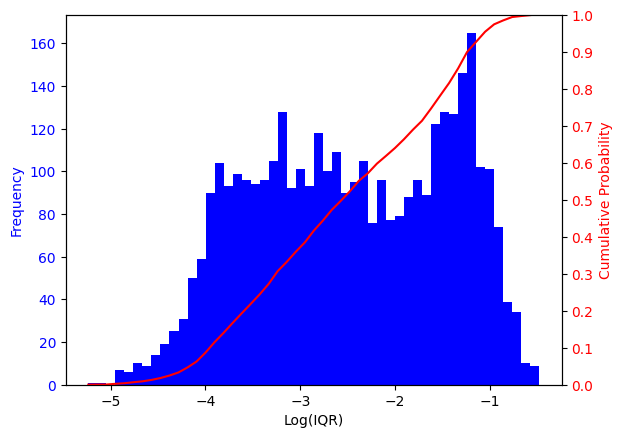

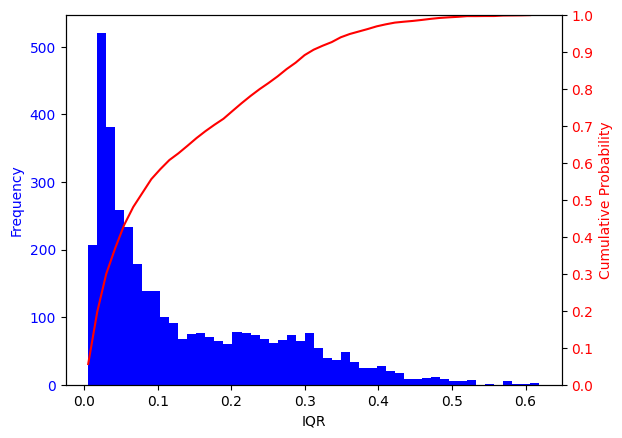

In [58]:
IQR = calculate_IQR(df[Keys.features])
_ = plot_hist_with_cumprob(np.log(IQR), 'Log(IQR)', bins=50)
_ = plot_hist_with_cumprob(IQR, 'IQR', bins=50)

In [ ]:
import pandas as pd
import numpy as np
from datetime import date

# Assume 'df' is already loaded and available
# Define the utility directory for saving the output files
util_dir = "path_to_util_directory"

def calculate_IQR(betas):
    return betas.apply(np.quantile, q=[0.25, 0.75]).diff().iloc[1]

def write_top_probes(df, identifier, top_n=10000):
    IQR = calculate_IQR(df.drop(columns=identifier))
    top_probes = IQR.sort_values(ascending=False).head(top_n).index
    filename = f"{util_dir}/{date.today()}_{df[identifier].iloc[0]}_cpg_probes.csv"
    pd.DataFrame(top_probes).to_csv(filename, index=False)

# Main function to process the DataFrame
def process_dataframe(df):
    # Calculating IQR for the entire dataset excluding identifier columns
    ref_IQR = calculate_IQR(df.iloc[:, 3:])
    superfamily_probes = ref_IQR.sort_values(ascending=False).head(10000).index
    pd.DataFrame(superfamily_probes).to_csv(f"{util_dir}/{date.today()}_superfamily_probes.csv", index=False)
    
    # Processing for each superfamily code
    for code in df['Superfamily_code'].unique():
        superfamily_df = df[df['Superfamily_code'] == code].drop(columns=['Superfamily_code', 'Family_code', 'Class_v12_code'])
        write_top_probes(superfamily_df, 'Family_code')
    
    # Processing for each family code
    for code in df['Family_code'].unique():
        family_df = df[df['Family_code'] == code].drop(columns=['Superfamily_code', 'Family_code', 'Class_v12_code'])
        write_top_probes(family_df, 'Class_v12_code')

# Call the function
process_dataframe(df)


In [4]:
import pandas as pd
import numpy as np
from datetime import date

def calculate_IQR(betas):
    """Calculate the IQR for each column."""
    return betas.apply(np.quantile, q=[0.25, 0.75]).diff().iloc[1]

def write_top_probes(df, identifier, top_n=10000):
    """Write top probes based on IQR to a CSV file."""
    IQR = calculate_IQR(df.drop(columns=identifier))
    top_probes = IQR.sort_values(ascending=False).head(top_n).index
    filename = f"{date.today()}_{df[identifier].iloc[0]}_cpg_probes.csv"
    pd.DataFrame(top_probes).to_csv(filename, index=False)

def process_dataframe(df):
    """Process the dataframe to find and write top probes based on IQR."""
    # Exclude the first three columns for the initial IQR calculation
    ref_IQR = calculate_IQR(df.iloc[:, 3:])
    superfamily_probes = ref_IQR.sort_values(ascending=False).head(10000).index
    pd.DataFrame(superfamily_probes).to_csv(f"{date.today()}_superfamily_probes.csv", index=False)
    
    # For each superfamily code
    for code in df['Superfamily_code'].unique():
        superfamily_df = df[df['Superfamily_code'] == code].drop(columns=['Superfamily_code', 'Family_code', 'Class_v12_code'])
        write_top_probes(superfamily_df, 'Family_code')
    
    # For each family code
    for code in df['Family_code'].unique():
        family_df = df[df['Family_code'] == code].drop(columns=['Superfamily_code', 'Family_code', 'Class_v12_code'])
        write_top_probes(family_df, 'Class_v12_code')

# Assuming df is your DataFrame
# process_dataframe(df)


In [5]:
# Call the function
process_dataframe(df)

KeyError: "['Family_code'] not found in axis"